In [1]:
# dependency imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import simplekml
import geopy
from geopy.distance import geodesic

In [2]:
# package imports

from drone_dome import PlottingAndSchematics
from drone_dome import MakeDome
from drone_dome import MakeCoords
from drone_dome import MakeKML

# Code Structure

### MakeDome

input dome radius (m), dome height (measured from top point, m), grid density (angular separation bewteen points)

generate dome coords from meshgrid

render the dome in arbitrary space, make adjustments as needed

### MakeCoords

turn 3d meshgrid into 2d array (each col is a coord dimension, rows are a single point): sort the points because order matters: split and do two files for the two directions of passes, with different sorting for each, also helps with waypoint count

and then make it a pandas dataframe because it makes indexing and transformations sooooooo much easier

for each point, find distance from center at xy coords (0,0), make this a new column in dataframe

for each point, use distance, theta, and starting point to convert dome coords to lat lon coords, make lat and lon new columns in dataframe

plot dome with lat lon coords on top of map of area, see number of waypoints produced

### MakeKML

write kml file that contains all of the coordinates as a linestring, export kml, read kml into ugcs IN PERIMETER MODE

In [3]:
# instantiate the MakeDome class to generate the dome
dome = MakeDome(angle_between_points=20, height=70, radius=20)

# call the dome_points method to generate five arrays, each containing coordinate data
# x, y, and z are parametrized cartesian coordinate versions of the spherical theta and phi
x, y, z, theta, phi = dome.dome_points()

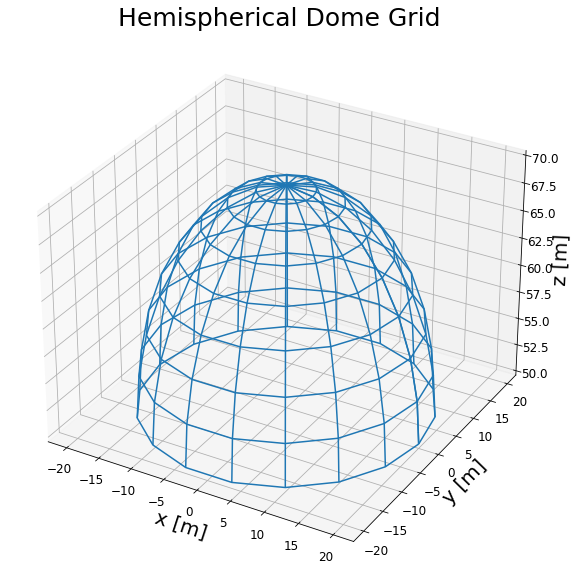

In [4]:
# instantiate the PlottingAndSchematics class to visualize the dome
plots = PlottingAndSchematics()

# rendering the dome in arbitrary space
fig, ax = plots.render_dome(x, y, z)

In [8]:
# instantiate the MakeCoords class
coords = MakeCoords(x, y, z, theta, phi, latitude=40.869932, longitude=-72.866064)

# generate the latitude/longitude coordinates of the ring passes
df_ring = coords.make_lat_lon_ring()

# generate the latitude/longitude coordinates of the arch passes
df_arch = coords.make_lat_lon_arch()

### NEED TO ADJUST WHERE THE NUMBER OF WAYPOINTS GETS SPIT OUT!!!

NUMBER OF WAYPOINTS = 171
NUMBER OF WAYPOINTS = 171


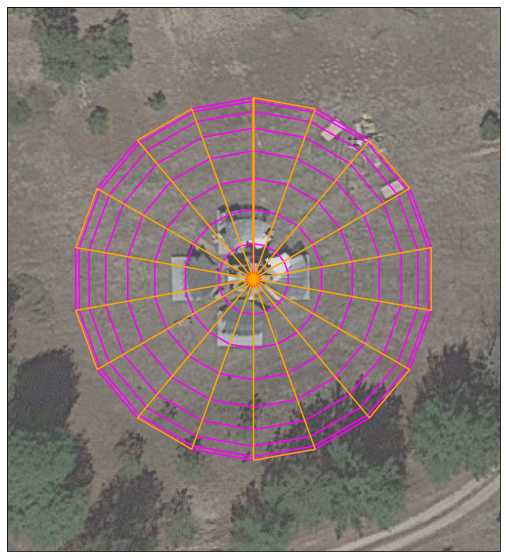

In [9]:
# plot the lat/lon coordinates on top of satellite imagery to verify the location is correct
# this is a top view only, it does not show altitude
# altitude is not affected by the lat/lon transformation as is the same z visualized above in the dome rendering
fig, ax = plots.sat_plot(df_ring, df_arch, dish_longitude=-72.866064, dish_latitude=40.869932)

In [7]:
# instantiate the MakeKML class
kml = MakeKML()

# generate separate files for the ring passes and the arch passes
# this helps keep the number of waypoints in each file low
# easy to upload second direction while still in the air
kml.make_kml(df_ring, 'demo_ring_path.kml')
kml.make_kml(df_arch, 'demo_arch_path.kml')